Homework 4 - Multi-Class Classification 

Nishchay Patel

1. Loading the Dataset

In [62]:
import pandas as pd

In [63]:
data = pd.read_csv('performance.csv')
data.drop(columns=['Unnamed: 0'], inplace=True)

In [64]:
print(data.sample(5))

     Adm_Year  Gender   Age  HSC_Pass_Year Program Merit_Scholarship  \
653    2022.0  Female  20.0         2022.0    BCSE                No   
639    2021.0  Female  22.0         2020.0    BCSE               Yes   
522   22022.0    Male  21.0         2020.0    BCSE               Yes   
35     2019.0    Male  23.0         2018.0    BCSE                No   
461    2021.0  Female  22.0         2019.0    BCSE               Yes   

    Uni_Transport Learn_Mode Smartphone   PC  ... SM_Hours1 Avg_Attendance1  \
653            No     Online        Yes   No  ...       3.0            60.0   
639            No     Online        Yes  Yes  ...       4.0            98.0   
522            No     Online        Yes   No  ...       3.0            98.0   
35            Yes    Offline        Yes  Yes  ...       3.0            90.0   
461           Yes    Offline        Yes  Yes  ...       4.0            70.0   

                     Skills1 Skill_Dev_Hours1  \
653  Artificial Intelligence              1

In [65]:
data.isnull().sum()

Adm_Year                                                                      0
Gender                                                                        0
Age                                                                           0
HSC_Pass_Year                                                                 0
Program                                                                       0
Merit_Scholarship                                                             0
Uni_Transport                                                                 0
Learn_Mode                                                                    0
Smartphone                                                                    0
PC                                                                            0
Eng_Proficiency                                                               0
Probation                                                                     0
Suspension                              

In [66]:
print(data.nunique())

Adm_Year                                                                       12
Gender                                                                          2
Age                                                                            10
HSC_Pass_Year                                                                  12
Program                                                                         1
Merit_Scholarship                                                               2
Uni_Transport                                                                   2
Learn_Mode                                                                      2
Smartphone                                                                      2
PC                                                                              2
Eng_Proficiency                                                                 3
Probation                                                                       2
Suspension      

Label Distribution:
Target
Poor         503
Average      272
Good         178
Excellent     56
Name: count, dtype: int64


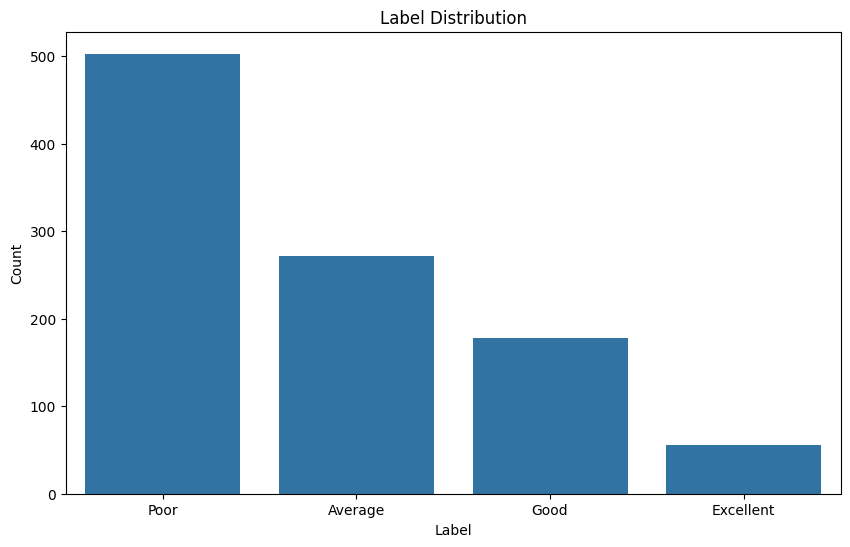

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
getting_count = data["Target"]

label_counts = getting_count.value_counts()
print("Label Distribution:")
print(label_counts)

plt.figure(figsize=(10, 6))
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.title('Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [68]:
data.columns

Index(['Adm_Year', 'Gender', 'Age', 'HSC_Pass_Year', 'Program',
       'Merit_Scholarship', 'Uni_Transport', 'Learn_Mode', 'Smartphone', 'PC',
       'Eng_Proficiency', 'Probation', 'Suspension',
       'Do you attend in teacher consultancy for any kind of academical problems? ',
       'Relationship', 'CoCurricular', 'Living_Arrangement', 'Health_Issues',
       'Physical_Disabilities', 'Target', 'Curr_Sem1', 'Study_Hours1',
       'Study_Sessions1', 'SM_Hours1', 'Avg_Attendance1', 'Skills1',
       'Skill_Dev_Hours1', 'Interest_Area1', 'Prev_SGPA1', 'Curr_CGPA1',
       'Completed_Credits1', 'Diploma', 'Family_Income1'],
      dtype='object')

In [69]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Step 1: Make sure that your column names are correct
data.columns = data.columns.str.strip()  # Remove any leading/trailing spaces
data.columns = data.columns.str.replace(' ', '_')  # Replace spaces with underscores

# Step 2: Encode the target variable using LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['Target'])  # Target variable encoded

# Step 3: Select the feature columns (X) by dropping the target column
X = data.drop('Target', axis=1)

# Step 4: Define the categorical columns (nominal and ordinal)
categorical_columns_nominal = ['Gender', 'Merit_Scholarship', 'Uni_Transport', 'Learn_Mode', 'Smartphone', 'PC', 'Program', 'Skills1', 'Interest_Area1']
categorical_columns_ordinal = ['Eng_Proficiency', 'Relationship']  # Modify if needed based on the unique counts

# Step 5: Define the numerical columns
numerical_columns = ['Age', 'Adm_Year', 'HSC_Pass_Year', 'Curr_Sem1', 'Study_Hours1', 
                     'Study_Sessions1', 'SM_Hours1', 'Avg_Attendance1', 'Skill_Dev_Hours1', 
                     'Prev_SGPA1', 'Curr_CGPA1', 'Completed_Credits1', 'Family_Income1']

# Step 6: Create a ColumnTransformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        # OneHotEncoder for nominal categorical columns
        ('cat_nominal', OneHotEncoder(drop='first'), categorical_columns_nominal),
        
        # StandardScaler for numerical columns
        ('num', StandardScaler(), numerical_columns)
    ])

# Step 7: Apply ColumnTransformer to the feature set (X) to preprocess the data
X_processed = preprocessor.fit_transform(X)

# Step 8: Split the dataset into training (70%) and testing (30%) sets using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.3, random_state=42)

# Now, X_train, X_test, y_train, and y_test are ready for use in machine learning tasks.


In [70]:
X_train_dense = X_train.toarray()

# Convert to DataFrame for sampling (optional)
X_train_df = pd.DataFrame(X_train_dense)

# Now you can sample
X_train_df.sample(3)

,0,1,2,3,4,5,6,7,8,9,...,97,98,99,100,101,102,103,104,105,106
601,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,-0.149961,-0.159666,-0.064700,0.229971,-1.126928,-0.152709,0.890310,0.763886,-1.130503,-0.485829
428,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,-0.131217,-1.113991,-1.031837,-0.180176,-0.193577,-0.831491,0.657098,0.080205,0.231888,-0.170321
551,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,-0.153710,-0.159666,-0.064700,0.229971,0.739774,-0.152709,1.076880,0.640824,-1.382022,-0.359626


In [71]:
X_test_dense = X_test.toarray()

# Convert to DataFrame for sampling (optional)
X_test_df = pd.DataFrame(X_test_dense)

# Now you can sample
X_test_df.sample(3)

,0,1,2,3,4,5,6,7,8,9,...,97,98,99,100,101,102,103,104,105,106
272,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,-0.119970,-0.159666,-1.031837,-0.180176,-1.126928,-0.152709,-0.765499,-0.015510,1.258922,-0.233422
35,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,-0.123719,0.317496,-0.064700,-1.000469,-1.126928,-0.152709,0.062406,-0.015510,0.567246,-0.649893
302,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,-0.112472,-0.636829,-0.064700,0.640117,-0.815811,-0.831491,-0.240771,-0.767559,0.902604,-0.548930


In [72]:
y_train_df = pd.DataFrame(y_train, columns=['Target'])
y_test_df = pd.DataFrame(y_test, columns=['Target'])

In [73]:
print(X_train_df.shape,y_train_df.shape)
print(X_test_df.shape,y_test_df.shape)

(706, 107) (706, 1)
(303, 107) (303, 1)


Logistic Regression Accuracy:  0.7524752475247525
Support Vector Machine Accuracy:  0.768976897689769
MLP Classifier Accuracy:  0.7458745874587459

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.56      0.58        73
           1       0.62      0.42      0.50        12
           2       0.62      0.62      0.62        65
           3       0.88      0.93      0.90       153

    accuracy                           0.75       303
   macro avg       0.68      0.63      0.65       303
weighted avg       0.74      0.75      0.75       303


Support Vector Machine Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.62      0.60        73
           1       0.60      0.25      0.35        12
           2       0.69      0.69      0.69        65
           3       0.89      0.92      0.90       153

    accuracy                           0.77       303
 

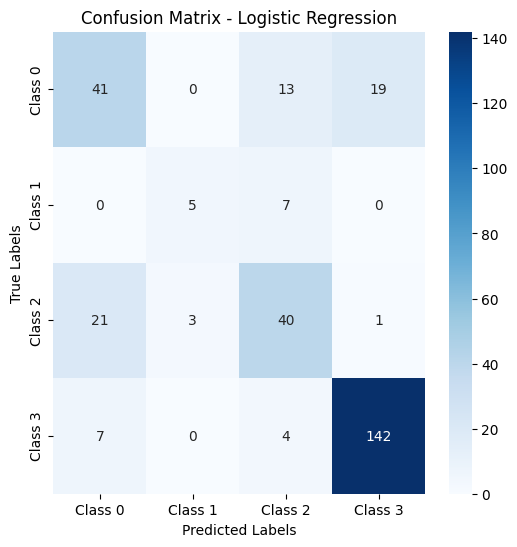

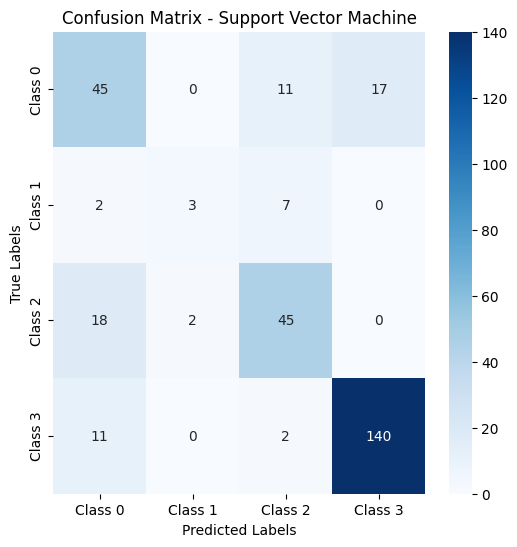

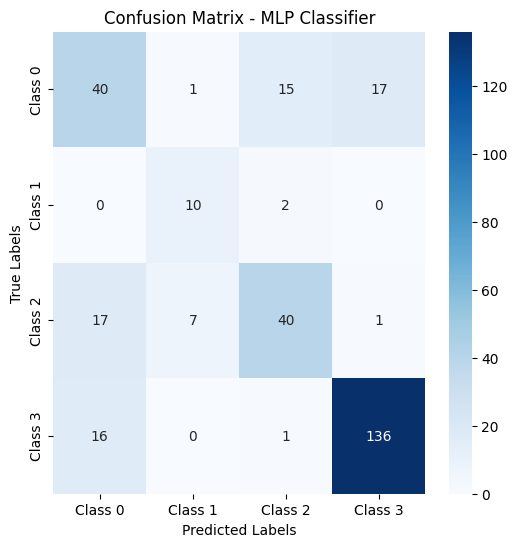

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Train the models

# Logistic Regression
log_reg = LogisticRegression(solver='saga', random_state=0)
log_reg.fit(X_train_df, y_train_df)

# Support Vector Machine (SVM)
svm = SVC(kernel='rbf', random_state=0)
svm.fit(X_train_df, y_train_df)

# Multi-Layer Perceptron (MLP)
mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_df, y_train_df)

# Step 2: Evaluate the models on the testing set
log_reg_pred = log_reg.predict(X_test_df)
svm_pred = svm.predict(X_test_df)
mlp_pred = mlp.predict(X_test_df)

# Calculate accuracy for each model
log_reg_accuracy = accuracy_score(y_test_df, log_reg_pred)
svm_accuracy = accuracy_score(y_test_df, svm_pred)
mlp_accuracy = accuracy_score(y_test_df, mlp_pred)

print("Logistic Regression Accuracy: ", log_reg_accuracy)
print("Support Vector Machine Accuracy: ", svm_accuracy)
print("MLP Classifier Accuracy: ", mlp_accuracy)

# Step 3: Generate classification reports
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test_df, log_reg_pred))

print("\nSupport Vector Machine Classification Report:")
print(classification_report(y_test_df, svm_pred))

print("\nMLP Classifier Classification Report:")
print(classification_report(y_test_df, mlp_pred))

# Step 4: Plot confusion matrix for each model

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Class 0", "Class 1", "Class 2", "Class 3"], yticklabels=["Class 0", "Class 1", "Class 2", "Class 3"])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

# Plot confusion matrix for each model
plot_confusion_matrix(y_test_df, log_reg_pred, "Logistic Regression")
plot_confusion_matrix(y_test_df, svm_pred, "Support Vector Machine")
plot_confusion_matrix(y_test_df, mlp_pred, "MLP Classifier")


In [75]:
import warnings
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Suppress specific warnings
warnings.filterwarnings('ignore', category=UserWarning)  # General user warnings


# Step 1: Define hyperparameters for tuning

# Logistic Regression and SVM: Tune the 'C' parameter
param_grid_log_reg_svm = {'C': [0.01, 0.1, 1, 10, 20, 50, 100]}

# MLP Classifier: Tune 'hidden_layer_sizes'
param_grid_mlp = {'hidden_layer_sizes': [(128,), (64, 64), (128, 64), (128, 64, 32)]}

# Step 2: Set up GridSearchCV for Logistic Regression and SVM
log_reg = LogisticRegression(solver='saga', random_state=0)
svm = SVC(kernel='rbf', random_state=0)

# Perform GridSearchCV for Logistic Regression and SVM
grid_search_log_reg = GridSearchCV(log_reg, param_grid_log_reg_svm, cv=5, scoring='accuracy')
grid_search_svm = GridSearchCV(svm, param_grid_log_reg_svm, cv=5, scoring='accuracy')

# Reshape y_train and y_test to 1D
y_train_1d = y_train_df.values.ravel()
y_test_1d = y_test_df.values.ravel()

# Fit the models on the training data
grid_search_log_reg.fit(X_train_df, y_train_1d)
grid_search_svm.fit(X_train_df, y_train_1d)

# Step 3: Set up GridSearchCV for MLP
mlp = MLPClassifier(random_state=0)

# Perform GridSearchCV for MLP
grid_search_mlp = GridSearchCV(mlp, param_grid_mlp, cv=5, scoring='accuracy')

# Fit the MLP model on the training data
grid_search_mlp.fit(X_train_df, y_train_1d)

# Step 4: Output the best parameters and the best score for each model

# Logistic Regression Best Parameters and Score
print("Best parameters for Logistic Regression: ", grid_search_log_reg.best_params_)
print("Best cross-validation accuracy for Logistic Regression: ", grid_search_log_reg.best_score_)

# SVM Best Parameters and Score
print("Best parameters for SVM: ", grid_search_svm.best_params_)
print("Best cross-validation accuracy for SVM: ", grid_search_svm.best_score_)

# MLP Best Parameters and Score
print("Best parameters for MLP: ", grid_search_mlp.best_params_)
print("Best cross-validation accuracy for MLP: ", grid_search_mlp.best_score_)

# Step 5: Evaluate the best models on the test set

# Logistic Regression Evaluation
best_log_reg = grid_search_log_reg.best_estimator_
log_reg_pred = best_log_reg.predict(X_test_df)
log_reg_accuracy = accuracy_score(y_test_1d, log_reg_pred)
print("Logistic Regression Test Accuracy: ", log_reg_accuracy)

# SVM Evaluation
best_svm = grid_search_svm.best_estimator_
svm_pred = best_svm.predict(X_test_df)
svm_accuracy = accuracy_score(y_test_1d, svm_pred)
print("SVM Test Accuracy: ", svm_accuracy)

# MLP Evaluation
best_mlp = grid_search_mlp.best_estimator_
mlp_pred = best_mlp.predict(X_test_df)
mlp_accuracy = accuracy_score(y_test_1d, mlp_pred)
print("MLP Test Accuracy: ", mlp_accuracy)


Best parameters for Logistic Regression:  {'C': 10}
Best cross-validation accuracy for Logistic Regression:  0.7663470182798922
Best parameters for SVM:  {'C': 50}
Best cross-validation accuracy for SVM:  0.8073119568474677
Best parameters for MLP:  {'hidden_layer_sizes': (128, 64, 32)}
Best cross-validation accuracy for MLP:  0.8088003196483868
Logistic Regression Test Accuracy:  0.7491749174917491
SVM Test Accuracy:  0.7854785478547854
MLP Test Accuracy:  0.768976897689769


Logistic Regression - Test Accuracy: 0.7491749174917491
Logistic Regression - Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.55      0.57        73
           1       0.60      0.50      0.55        12
           2       0.62      0.62      0.62        65
           3       0.88      0.92      0.90       153

    accuracy                           0.75       303
   macro avg       0.67      0.65      0.66       303
weighted avg       0.74      0.75      0.74       303

SVM - Test Accuracy: 0.7854785478547854
SVM - Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.64      0.64        73
           1       0.53      0.67      0.59        12
           2       0.75      0.66      0.70        65
           3       0.90      0.92      0.91       153

    accuracy                           0.79       303
   macro avg       0.70      0.72      0.71       303
weighted avg 

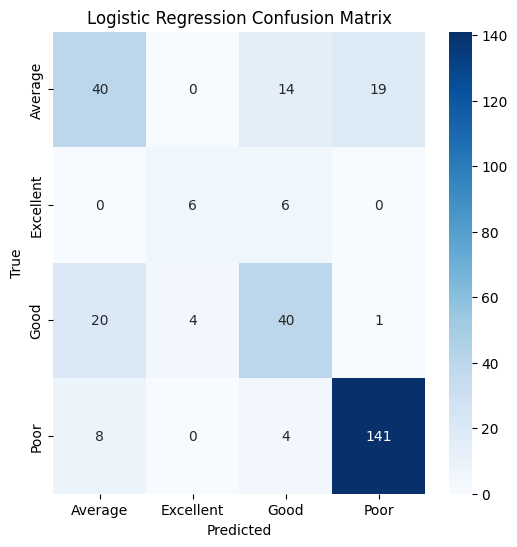

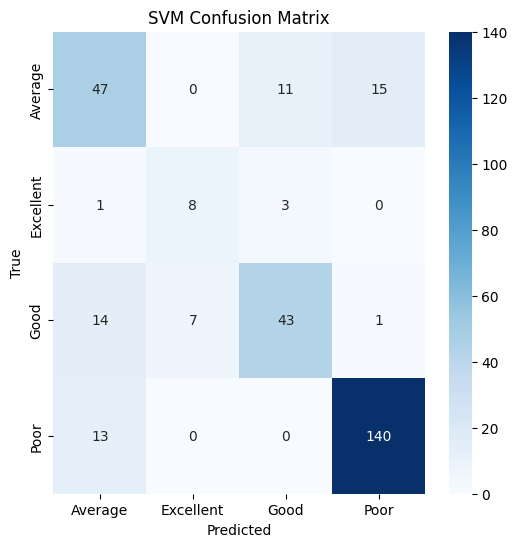

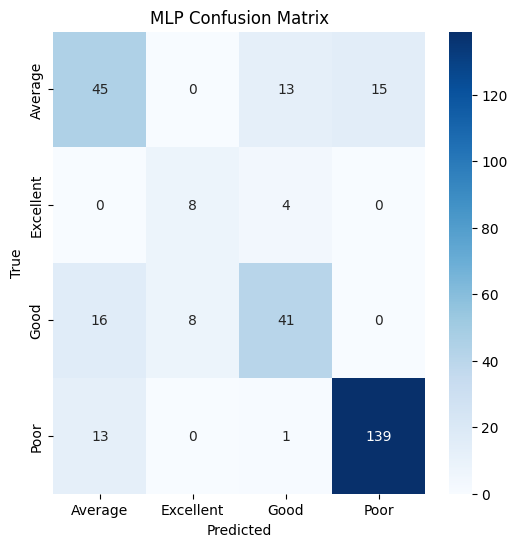

In [76]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
# Step 1: Retrain models with optimal hyperparameters obtained from GridSearchCV
warnings.filterwarnings('ignore', category=UserWarning)  # General user warnings

# Logistic Regression with optimal C value
best_log_reg = LogisticRegression(solver='saga', C=grid_search_log_reg.best_params_['C'], random_state=0)
best_log_reg.fit(X_train_df, y_train_df)

# SVM with optimal C value
best_svm = SVC(kernel='rbf', C=grid_search_svm.best_params_['C'], random_state=0)
best_svm.fit(X_train_df, y_train_df)

# MLP with optimal hidden_layer_sizes
best_mlp = MLPClassifier(hidden_layer_sizes=grid_search_mlp.best_params_['hidden_layer_sizes'], random_state=0)
best_mlp.fit(X_train_df, y_train_df)

# Step 2: Evaluate models on the test set

# Logistic Regression Evaluation
log_reg_pred = best_log_reg.predict(X_test_df)
log_reg_accuracy = accuracy_score(y_test_df, log_reg_pred)
log_reg_class_report = classification_report(y_test_df, log_reg_pred)

# SVM Evaluation
svm_pred = best_svm.predict(X_test_df)
svm_accuracy = accuracy_score(y_test_df, svm_pred)
svm_class_report = classification_report(y_test_df, svm_pred)

# MLP Evaluation
mlp_pred = best_mlp.predict(X_test_df)
mlp_accuracy = accuracy_score(y_test_df, mlp_pred)
mlp_class_report = classification_report(y_test_df, mlp_pred)

# Step 3: Output the results

print("Logistic Regression - Test Accuracy:", log_reg_accuracy)
print("Logistic Regression - Classification Report:\n", log_reg_class_report)

print("SVM - Test Accuracy:", svm_accuracy)
print("SVM - Classification Report:\n", svm_class_report)

print("MLP - Test Accuracy:", mlp_accuracy)
print("MLP - Classification Report:\n", mlp_class_report)

# Step 4: Plot Confusion Matrices for each model

# Confusion Matrix for Logistic Regression
log_reg_cm = confusion_matrix(y_test_df, log_reg_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(log_reg_cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Confusion Matrix for SVM
svm_cm = confusion_matrix(y_test_df, svm_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Confusion Matrix for MLP
mlp_cm = confusion_matrix(y_test_df, mlp_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(mlp_cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("MLP Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()
